# CIFAR Conv Net

И так, в этом ноутбуке Вы сделаете превую в своей жизни сверточную сеть! На сложном датасете. Cкачайте его кстати, 

In [1]:
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  3789k      0  0:00:43  0:00:43 --:--:-- 3008k0:00:49  0:00:01  0:00:48 3328k02  0:00:19 7861k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from cifar import load_CIFAR10
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [3]:
try:
    mean_std = np.load(os.path.join(os.getcwd(), 'cifar-10-mean_std.npz'))
    mean = mean_std['mean']
    std = mean_std['std']
except IOError:
    mean = (X_train.mean(axis=(0, 2, 3), keepdims=True).astype(np.float32) +\
    X_test.mean(axis=(0, 2, 3), keepdims=True).astype(np.float32)) / 2 
    std = np.concatenate((X_train, X_test)).std(axis=(0, 2, 3), keepdims=True).astype(np.float32)
    np.savez(os.path.join(os.getcwd(), 'cifar-10-mean_std.npz'),
             mean=mean, std=std)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

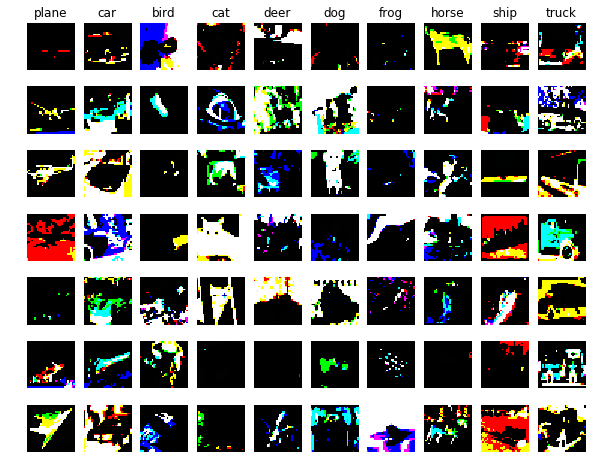

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

<h1 align="center">First of all -- Checking Questions</h1> 

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

<Ответ>

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

<Ответ>

**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить?

<Ответ>

**Вопрос 4**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

<Ответ>

**Вопрос 5**: Как сделать стайл трансфер для музыки? oO

<Ответ>

In [5]:
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import *

input_X = T.tensor4("X")
target_y = T.vector("target Y integer",dtype='int32')

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN 5103)


In [6]:
# import implemented

# Соберите нейронку: 
- Many times x (Conv+Pool)
- Many small convolutions like 3x3
- Batch Norm 
- Residual Connection
- Data Augmentation 
- Learning rate Schedule 
- ...

### Для вдохновения 
- http://torch.ch/blog/2015/07/30/cifar.html
- http://www.robots.ox.ac.uk/~vgg/research/very_deep/
- https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf
- https://github.com/szagoruyko/wide-residual-networks 

### Самое интересное
- Для сдачи задания нужно набрать на точность тесте > **92.5**% (это займет много времени, торопитесь :) )
- Для получения бонусных баллов > **95.0**%
- Будет очень хорошо если вы придумаете свою архитектуру или сможете обучить что-то из вышеперечисленного :)
- А для обучения всего этого добра вам будет куда удобнее использовать GPU на Amazon 
    - Инструкция https://github.com/persiyanov/ml-mipt/tree/master/amazon-howto 
    - Вам помогут tmux, CuDNN, ssh tunnel, nvidia-smi, ... 
    - Wish you get fun :)

In [7]:
import implemented2

In [9]:
import sys
sys.path.append('/home/ec2-user/papers/preactivation_and_wide_resnet')
# print(sys.path)
import  models

In [10]:
# net = lasagne.layers.InputLayer(shape=(None, 3, 32, 32), input_var=input_X)

# net = implemented.build_densenet(input_shape=(None, 3, 32, 32), input_var=input_X, dropout= 0.2)
# network = implemented2.create_v3(input_X, input_shape=(None, 3, 32, 32),ccp_num_filters=[32, 64, 128, 128, 256],
#                                  fc_num_units=[256, 256])
network = models.ResNet_FullPre_Wide(input_var=input_X)
# net = lasagne.layers.DenseLayer(net,num_units = 10, nonlinearity=softmax)

In [11]:
prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_y)
loss = loss.mean()
regu_loss = lasagne.regularization.regularize_network_params(
    network, lasagne.regularization.l2)
loss = loss + regu * regu_loss
accuracy = T.mean(T.eq(T.argmax(prediction, axis=1), target_y),
                   dtype=theano.config.floatX)
learning_rate_var = theano.shared(np.float32(learning_rate))
momentum_var = theano.shared(np.float32(momentum))
params = lasagne.layers.get_all_params(network, trainable=True)
updates = lasagne.updates.nesterov_momentum(
    loss, params, learning_rate=learning_rate_var, momentum=momentum_var)
# test_prediction = lasagne.layers.get_output(network, deterministic=True)
# test_loss = lasagne.objectives.categorical_crossentropy(test_prediction,
#                                                         target_y)
# test_loss = test_loss.mean()
# test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_y),
#                   dtype=theano.config.floatX)
# train_fun = theano.function([input_X, target_y], loss, updates=updates, allow_input_downcast=True)
# train_acc_fn = theano.function([input_X, target_y], accuracy_fun, allow_input_downcast=True)
train_fun = theano.function([input_X,target_y],[loss, accuracy], updates=updates, allow_input_downcast=True)
# train_fn = theano.function([input_X,target_y], loss, updates=updates, allow_input_downcast=True)
accuracy_fun = theano.function([input_X,target_y],accuracy, allow_input_downcast=True)

In [42]:
learning_rate_var.get_value()

array(9.99999883788405e-07, dtype=float32)

In [41]:
learning_rate_var.set_value(lasagne.utils.floatX(learning_rate_var.get_value() * 0.1))

### Вот и всё, пошли её учить

In [12]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [13]:
import augment

In [16]:
import augment2
aug1=augment2.AddElementwise()
aug2 = augment2.WithChannels([0], augment2.Add(10))

# Процесс обучения

In [43]:
import time

X_val = X_test
y_val = y_test
num_epochs = 7 #количество проходов по данным

batch_size = 128 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    
#     if epoch % 4 == 0:
#     for batch in iterate_minibatches(X_train, y_train,batch_size):
#         inputs, targets = batch
#         train_err_batch, train_acc_batch= train_fun(inputs, targets)
#         train_err += train_err_batch
#         train_acc += train_acc_batch
#         train_batches += 1
#     elif epoch % 4 == 1:
    for batch in aug1.augment_batches(iterate_minibatches(X_train, y_train,batch_size)):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1
#     elif epoch % 4 == 2:
#     for batch in augmenter2.augment_batches(iterate_minibatches(X_train, y_train,batch_size)):
#         inputs, targets = batch
#         train_err_batch, train_acc_batch= train_fun(inputs, targets)
#         train_err += train_err_batch
#         train_acc += train_acc_batch
#         train_batches += 1
    
#     elif epoch % 4 == 3:
#     for batch in augment.augment_minibatches(iterate_minibatches(X_train, y_train,batch_size), flip=0.8, trans=3):
#         inputs, targets = batch
#         train_err_batch, train_acc_batch= train_fun(inputs, targets)
#         train_err += train_err_batch
#         train_acc += train_acc_batch
#         train_batches += 1
    

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1

    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(val_acc / val_batches * 100))
    
    of = open("res.txt", "a")
    of.write("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    of.write("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    of.write("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
    of.write("  validation accuracy:\t\t{:.2f} %".format(val_acc / val_batches * 100))
    
    of.close()

KeyboardInterrupt: 

In [44]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 80:
    print "Achievement unlocked: колдун 80 уровня"
else:
    print "Нужно больше магии!"

Final results:
  test accuracy:		86.90 %
Achievement unlocked: колдун 80 уровня


## Заполните форму

https://goo.gl/forms/EeadABISlVmdJqgr2 

In [45]:
np.savez('model.npz', *lasagne.layers.get_all_param_values(network))